In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [30]:
data = pd.read_csv('University_of_Hawaii_Courses_2016-2020.csv')
data

,Department,Course Catalogue Number,Course Name,Description,Graduate/Undergraduate,Lab,Year,Keywords
0,Administration of Justice (AJ) Courses,AJ180,Intro to Homeland Security,"An examination of the history of terrorism, f...",Undergraduate,False,2019-2020,['land']
1,Aeronautical Sciences (AERS) Courses,AERS102,Elem Private Pilot Ops II,"Introduction to the basic rules, regulations,...",Undergraduate,False,2019-2020,['land']
2,Aeronautical Sciences (AERS) Courses,AERS201,Private Pilot License Pre Solo,Introduces the airplane to entry-level studen...,Undergraduate,False,2019-2020,['land']
3,Aeronautical Sciences (AERS) Courses,AERS202,Private Pilot Solo &amp; Checkride,"Introduces cross-country navigation, emergenc...",Undergraduate,False,2019-2020,['land']
4,Aeronautical Sciences (AERS) Courses,AERS221,Elem Multi-Eng Ops II,This course focuses on elementary commercial ...,Undergraduate,False,2019-2020,['land']
...,...,...,...,...,...,...,...,...
899,Spanish (SPAN) Courses,SPAN306,Medical Spanish,This class will develop students linguistical...,Undergraduate,False,2016-2017,[' diabetes ']
900,Tourism (TOUR) Courses,TOUR317,Mkt &amp; Mgt Of Travel &amp; Tourism,Principles of marketing and management applie...,Undergraduate,False,2016-2017,[' restaurant']
901,Tourism (TOUR) Courses,TOUR350,Intro to Sustainable Tourism,Management and marketing issues faced by comm...,Undergraduate,False,2016-2017,['land']
902,Gender and Womens Studies (WS) Courses,WS305B,Themes in Regnl Geog: Mid East,Surveys regional landscapes of the Middle Eas...,Undergraduate,False,2016-2017,['land']


In [31]:
data['Keywords'] = data['Keywords'].apply(lambda x: x[1:-1].split(', '))
clean_data = data.explode('Keywords')

In [32]:
# frequency of top 50 keywords
frequency_top50 = clean_data['Keywords'].value_counts().to_frame().head(50)
frequency_top50.to_excel("University_of_Hawaii_EDA.xlsx") 
frequency_top50.head()

,Keywords
'land',321
' animal',101
'agri',92
' fish',69
' nutri',54


In [33]:
# frequency of top 50 keywords in each department
by_department = clean_data[clean_data['Keywords'].isin(frequency_top50.index)].groupby(['Department','Keywords']).count()
frequency_in_department = by_department.loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
frequency_in_department.head()

Count
Department                             Keywords       
Administration of Justice (AJ) Courses 'land'        4
Aeronautical Sciences (AERS) Courses   'land'        4
Agribusiness (AGBU) Courses            'agri'       16
                                       'agro'        1
                                       'crop'        4

In [39]:
# top keyword in each department
by_department_fullkeywords = clean_data.groupby(['Department','Keywords']).count().loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
by_department_fullkeywords_reset = by_department_fullkeywords.reset_index()
top_word_in_dept = by_department_fullkeywords_reset.sort_values('Count').groupby('Department').last()
top_word_in_dept

,Keywords,Count
Department,,
Administration of Justice (AJ) Courses,'land',4
Aeronautical Sciences (AERS) Courses,'land',4
Agribusiness (AGBU) Courses,'agri',16
Agricultural Economics (AGEC) Courses,'farm',12
Agricultural Engineering (AGEN) Courses,'farm',12
Agriculture (AG) Courses,'agri',29
Agronomy (AGRN) Courses,' herba',4
Animal Science (ANSC) Courses,' animal',28
Anthropology (ANTH) Courses,'botany',10


In [35]:
#distribution of top 10 
top3_department = by_department_fullkeywords_reset.groupby('Department').sum().sort_values('Count',ascending=False).head(3)
top3_department

,Count
Department,
Biology (BIOL) Courses,165
Animal Science (ANSC) Courses,128
Horticulture (HORT) Courses,119


In [36]:
top3_dept_name = top3_department.index
top3_dept_name

Index(['Biology (BIOL) Courses', 'Animal Science (ANSC) Courses',
       'Horticulture (HORT) Courses'],
      dtype='object', name='Department')

In [40]:
with pd.ExcelWriter('University_of_Hawaii_EDA.xlsx') as writer:
    frequency_top50.to_excel(writer, sheet_name='Top 50 keywords')
    frequency_in_department.to_excel(writer, sheet_name='Frequency for each Department')
    top_word_in_dept.to_excel(writer, sheet_name='Top keyword in Department')
    top3_department.to_excel(writer, sheet_name='Top 3 Departments')

Text(0.5, 1.0, 'Biology (BIOL) Courses')

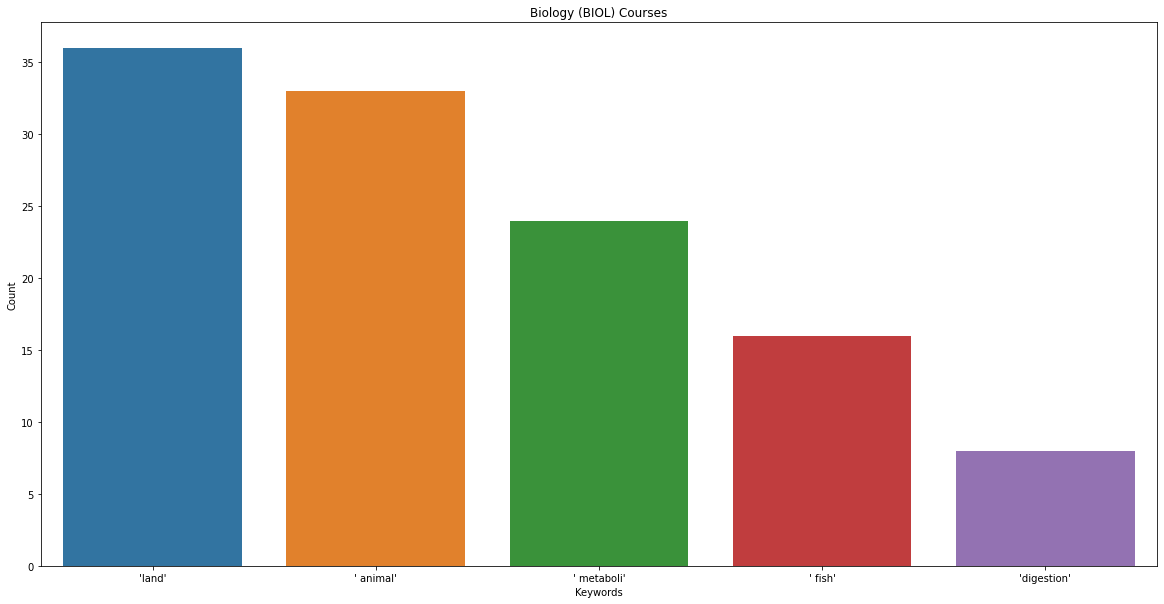

In [41]:
# ANSI
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[0]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[0])

Text(0.5, 1.0, 'Animal Science (ANSC) Courses')

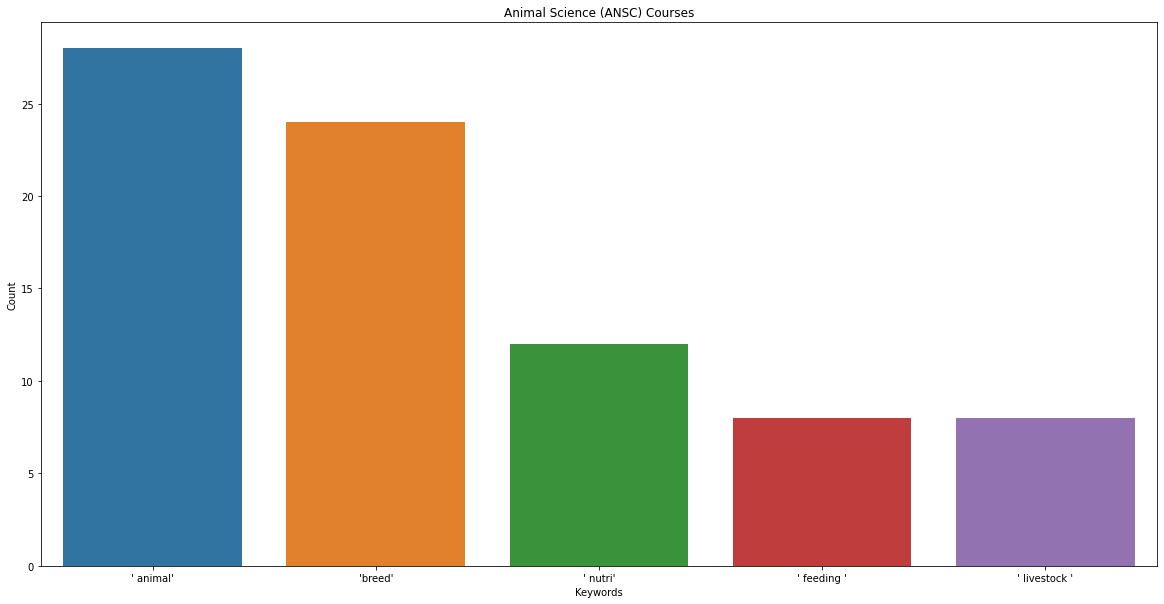

In [42]:
# NSCI
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[1]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[1])

Text(0.5, 1.0, 'Horticulture (HORT) Courses')

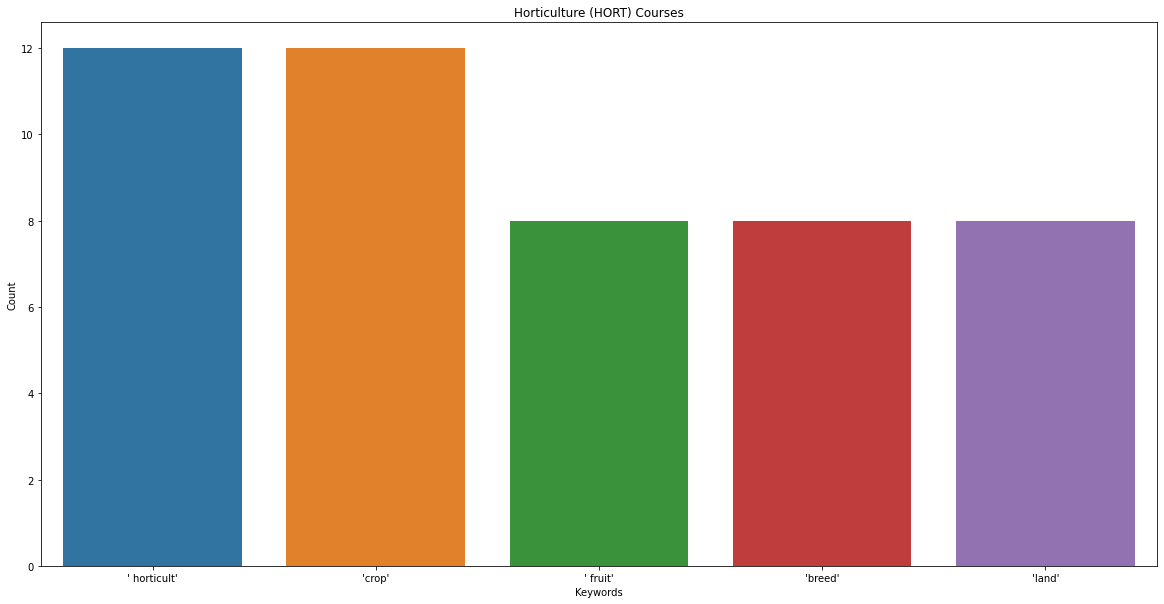

In [43]:

# NREM
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[2]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[2])